# Local Image Descriptors
- Finding corresponding points and regions between images.

# 2.1 Harris corner detector
- One of the simplest corner indicators.
- The general idea is to locate interest points where the surrounding neighborhood shows edges in more than one direction -> image corners.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [12]:
# blur the image first using Gaussian derivative filters to suppress noise sensitivity in the corner detection.
# image with each pixel containing the value of the Harris response function.

from scipy.ndimage import filters

def compute_harris_response(im, sigma = 3):
    '''
    Compute the Harris corner detector response function
    for each pixel in a graylevel image.
    '''
    
    # derivatives
    imx = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma, sigma), (0, 1), imx)
    imy = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma, sigma), (1, 0), imy)
    
    # compute components of the Harris matrix
    Wxx = filters.gaussian_filter(imx*imx, sigma)
    Wxy = filters.gaussian_filter(imx*imy, sigma)
    Wyy = filters.gaussian_filter(imy*imy, sigma)
    
    # determinant and trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy
    
    return Wdet / Wtr

def get_harris_points(harrisim,min_dist=10,threshold=0.1):
    """
    Return corners from a Harris response image
    min_dist is the minimum number of pixels separating
    corners and image boundary.
    """
    # find top corner candidates above a threshold
    corner_threshold = harrisim.max() * threshold
    harrisim_t = (harrisim > corner_threshold) * 1

    # get coordinates of candidates
    coords = np.array(harrisim_t.nonzero()).T
    
    # ...and their values
    candidate_values = [harrisim[c[0],c[1]] for c in coords]
    
    # sort candidates
    index = np.argsort(candidate_values)
  
    # store allowed point locations in array
    allowed_locations = np.zeros(harrisim.shape)
    allowed_locations[min_dist:-min_dist,min_dist:-min_dist] = 1
    
    # select the best points taking min_distance into account
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i,0],coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i, 0] - min_dist):(coords[i, 0] + min_dist),
                              (coords[i, 1] - min_dist):(coords[i, 1] + min_dist)] = 0
            
    return filtered_coords

def plot_harris_points(image, filtered_coords):
    '''
    Plots corners found in image.
    '''
    plt.figure()
    plt.gray()
    plt.imshow(image)
    plt.plot([p[1] for p in filtered_coords], [p[0] for p in filtered_coords], '*')
    plt.axis('off')
    plt.show()

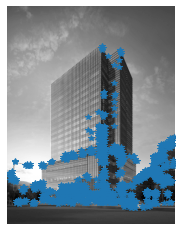

In [14]:
im = np.array(Image.open('/Users/sejongpyo/downloads/building.jpg').convert('L'))
harrisim = compute_harris_response(im)
filtered_coords = get_harris_points(harrisim, 6)
plot_harris_points(im, filtered_coords)

# 2.2 SIFT (Scale invariant feature transform)